In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Configurações visuais para os gráficos
sns.set_style("darkgrid")

In [3]:
# Leitura dos dados
df = pd.read_csv("publicacoes_pje_2024.csv")  # Substitua pelo caminho correto

In [4]:
# Convertendo todas as colunas para string
df = df.astype(str)

In [5]:
# Visualizando as primeiras linhas do dataset
df.head()

id tipoComunicacao                                              texto
0  69230295          Edital  DESAPROPRIAÇÃO  Nº 0104664-34.2015.4.02.5119/R...
1  69290615       Intimação  Poder Judiciário da Paraíba 2º Juizado Especia...
2  69302804          Edital  PODER JUDICIÁRIO - ESTADO DO RIO GRANDE DO NOR...
3  69289807       Intimação  PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...
4  69387820       Intimação  TRIBUNAL DE JUSTIÇA MILITAR DE SÃO PAULO - POD...

In [6]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1200 non-null   object
 1   tipoComunicacao  1200 non-null   object
 2   texto            1200 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB


In [7]:
# Verificando valores nulos
print(df.isnull().sum())

id                 0
tipoComunicacao    0
texto              0
dtype: int64


In [8]:
# Preenchendo valores nulos com "Desconhecido"
df = df.fillna("Desconhecido")

In [9]:
# Configuração do estilo do gráfico
sns.set_style("darkgrid")

<ipython-input-10-8d92bd09fd59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


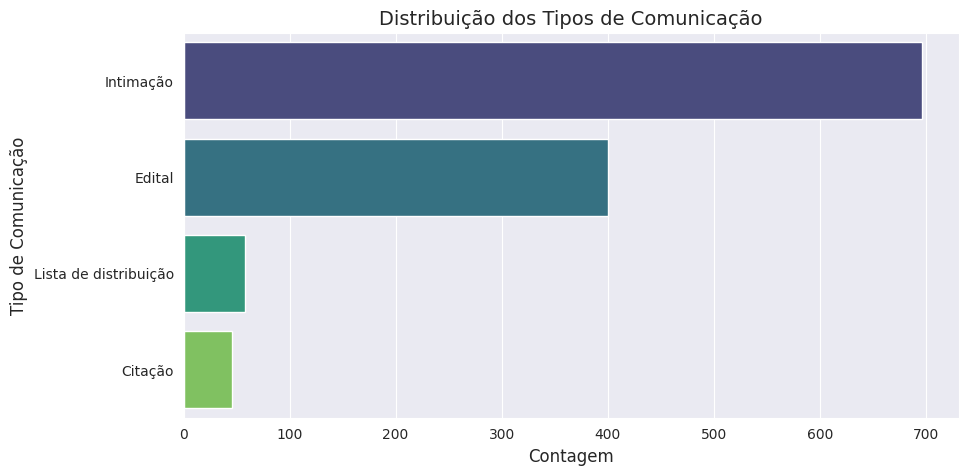

In [10]:
# Criando o gráfico de distribuição dos tipos de comunicação
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    y="tipoComunicacao",
    order=df["tipoComunicacao"].value_counts().index,  # Ordena pela contagem
    palette="viridis"
)

# Títulos e rótulos
plt.title("Distribuição dos Tipos de Comunicação", fontsize=14)
plt.xlabel("Contagem", fontsize=12)
plt.ylabel("Tipo de Comunicação", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [11]:
# Pré-processamento de texto

stop_words_portuguese = [
    "de", "a", "o", "que", "e", "do", "da", "em", "um", "para", "é", "com", "não", "uma", "os", "no", "se", "na",
    "por", "mais", "as", "dos", "como", "mas", "ao", "ele", "das", "à", "seu", "sua", "ou", "quando", "muito", "nos"
]

vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese)
X = vectorizer.fit_transform(df['texto'])
y = df['tipoComunicacao']

In [12]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Treinamento do modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

              Citação       1.00      0.71      0.83         7
               Edital       0.91      0.87      0.89        82
            Intimação       0.92      0.95      0.93       143
Lista de distribuição       0.89      1.00      0.94         8

             accuracy                           0.92       240
            macro avg       0.93      0.88      0.90       240
         weighted avg       0.92      0.92      0.92       240

